## Project: San Francisco Library Usage - Data Visualization and Analysis

### Objective:

***Objective of this project is to work with the SFO Library Usage data retrieved from San Francisco government website and build a story around the usage of library facilities in the SFO area***

### Step1: Read and understand the contents of data

- Read the data and prind the first 5 rows to view the data in each column
- View the shape of data and get the column names and data types of each column
- Get the statistics of the numeric columns and percentage of missing values in each column
- View the unique values in important categorical columns and rename the columns for easy usage

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset

data = pd.read_csv('Library_Usage.csv')

In [3]:
# Displaying first few records

data.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


In [4]:
# Dimensions of data

data.shape

(423448, 15)

In [5]:
# Columns list in dataset

data.columns.tolist()

['Patron Type Code',
 'Patron Type Definition',
 'Total Checkouts',
 'Total Renewals',
 'Age Range',
 'Home Library Code',
 'Home Library Definition',
 'Circulation Active Month',
 'Circulation Active Year',
 'Notice Preference Code',
 'Notice Preference Definition',
 'Provided Email Address',
 'Year Patron Registered',
 'Outside of County',
 'Supervisor District']

In [6]:
# Data types of columns in dataset

data.dtypes

Patron Type Code                  int64
Patron Type Definition           object
Total Checkouts                   int64
Total Renewals                    int64
Age Range                        object
Home Library Code                object
Home Library Definition          object
Circulation Active Month         object
Circulation Active Year          object
Notice Preference Code           object
Notice Preference Definition     object
Provided Email Address             bool
Year Patron Registered            int64
Outside of County                  bool
Supervisor District             float64
dtype: object

In [7]:
# Getting descriptive statistics

data.describe()

,Patron Type Code,Total Checkouts,Total Renewals,Year Patron Registered,Supervisor District
count,423448.000000,423448.000000,423448.000000,423448.000000,313138.000000
mean,1.036765,161.982097,59.657327,2010.348917,6.288240
std,4.188198,453.703678,225.009917,4.357374,3.123634
min,0.000000,0.000000,0.000000,2003.000000,1.000000
25%,0.000000,2.000000,0.000000,2007.000000,4.000000
50%,0.000000,19.000000,2.000000,2012.000000,6.000000
75%,1.000000,113.000000,27.000000,2014.000000,9.000000
max,104.000000,35907.000000,8965.000000,2016.000000,11.000000


In [8]:
# Finding missing values in dataset

data.isnull().mean()*100

Patron Type Code                 0.000000
Patron Type Definition           0.000000
Total Checkouts                  0.000000
Total Renewals                   0.000000
Age Range                        0.050774
Home Library Code                0.009446
Home Library Definition          0.000000
Circulation Active Month         0.000000
Circulation Active Year          0.000000
Notice Preference Code           0.000000
Notice Preference Definition     0.000000
Provided Email Address           0.000000
Year Patron Registered           0.000000
Outside of County                0.000000
Supervisor District             26.050424
dtype: float64

In [9]:
# Getting unique values in patron type definition column

data['Patron Type Definition'].unique()

array(['SENIOR', 'ADULT', 'DIGITAL ACCESS CARD', 'RETIRED STAFF', 'STAFF',
       'SPECIAL', 'WELCOME', 'TEACHER CARD', 'AT USER ADULT', 'VISITOR',
       'BOOKS BY MAIL', 'JUVENILE', 'AT USER SENIOR', 'FRIENDS FOR LIFE',
       'AT USER WELCOME', 'AT USER TEEN', 'YOUNG ADULT',
       'AT USER JUVENILE'], dtype=object)

In [10]:
# Getting unique values in age range column

data['Age Range'].unique()

array(['65 to 74 years', '55 to 59 years', '60 to 64 years',
       '45 to 54 years', '35 to 44 years', '25 to 34 years',
       '20 to 24 years', nan, '75 years and over', '0 to 9 years',
       '10 to 19 years'], dtype=object)

In [11]:
# Getting unique values in notice preference code column

data['Notice Preference Code'].unique()

array(['z', 'p', 'a', '-'], dtype=object)

In [12]:
# Getting unique values in year patron registered column

data['Year Patron Registered'].unique()

array([2003, 2012, 2016, 2011, 2010, 2008, 2009, 2014, 2007, 2006, 2013,
       2015, 2004, 2005], dtype=int64)

In [13]:
# Renaming column names

data.columns = ["patron_code","patron_type","total_checkouts","total_renewals","agerange","home_lib_code",
               "home_lib_type","active_month","active_year","notice_preference_code","notice_preference_type",
               "provided_email","year_patron_registered","outside_county","supervisor_district"]

In [14]:
# Printing first few records

data.head(2)

,patron_code,patron_type,total_checkouts,total_renewals,agerange,home_lib_code,home_lib_type,active_month,active_year,notice_preference_code,notice_preference_type,provided_email,year_patron_registered,outside_county,supervisor_district
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN


### Step2: Data Cleaning and Preparation

- Drop the columns with high percentage of missing values that do not add any value to our analysis
- Drop the rows with invalid values for age range and notice preference type, as we will continue to bases our analysis on these columns
- As seen in the missing values percentage these rows are negligible when comparing with the total data

In [15]:
# Dropping two columns as they are irrelevant for visualization 

data = data.drop(['home_lib_code','supervisor_district'], axis = 1)

data.head()

,patron_code,patron_type,total_checkouts,total_renewals,agerange,home_lib_type,active_month,active_year,notice_preference_code,notice_preference_type,provided_email,year_patron_registered,outside_county
0,3,SENIOR,28,13,65 to 74 years,Main Library,November,2012,z,email,True,2003,True
1,0,ADULT,21,10,55 to 59 years,Main Library,October,2015,z,email,True,2003,False
2,0,ADULT,275,559,60 to 64 years,Main Library,January,2015,z,email,True,2003,True
3,0,ADULT,73,38,45 to 54 years,Mission Bay,February,2016,z,email,True,2003,False
4,0,ADULT,182,90,45 to 54 years,Main Library,July,2016,z,email,True,2003,False


In [16]:
# Dropping all rows containing value None for notice preference type column

data.drop(data.loc[data['notice_preference_type'] == 'none'].index, inplace = True)

In [17]:
# Removing missing values from dataset

data = data.dropna()

In [18]:
# Checking missing values removed or not

data.isnull().sum()

patron_code               0
patron_type               0
total_checkouts           0
total_renewals            0
agerange                  0
home_lib_type             0
active_month              0
active_year               0
notice_preference_code    0
notice_preference_type    0
provided_email            0
year_patron_registered    0
outside_county            0
dtype: int64

### ***Showcasing Key Deliverables***

### Key Deliverable 1: Visualize the usage of library between age groups present the in the data

The data is divided by 10 groups of age ranges as collected by the libaray, in this view we will analyse and compare the total number of checkouts and renewals made by each age group and the renewal percentage for each of them. Below are the steps to get this visual,
- Group the data by age range and get the aggregate sum of total number of checkouts and renewals
- Get the ratio of total number of renewals to checkouts
- Plot the groups value of both aggregated columns in a column bar graph
- Draw the line showing the renewal percentage accross age groups in the same chart for comparision

**Definitions:**
- ***CheckOuts:*** The count of number of books borrowed from the library. The eligible number of books for checkouts depend on the type of user and in most cases Senior, Adult, Teen, Juvenile users can borrow upto 100 books.
- ***Renewals:*** The count of number of books renewed per each user type and library. Usually the user can borrow a book for upto 21 days and most items are eligible for up to 3 renewals of 21 days each.

In [19]:
# Performing grouping based on age range column and finding sum of total checkouts and total renewals

df = data.groupby('agerange', as_index = False).agg({"total_checkouts": "sum", "total_renewals": "sum"})
df['renewals_percentage'] = round(df['total_renewals']/df['total_checkouts'],2)*100
# df = df.sort_values(by = ['total_checkouts'], ascending = False)
# df.reset_index(inplace = True)
df.head(10)

,agerange,total_checkouts,total_renewals,renewals_percentage
0,0 to 9 years,5200325,1681899,32.0
1,10 to 19 years,13949159,3128973,22.0
2,20 to 24 years,3239396,1058420,33.0
3,25 to 34 years,4597179,2613029,57.0
4,35 to 44 years,7457738,3957668,53.0
5,45 to 54 years,10140974,4503720,44.0
6,55 to 59 years,5146667,2121105,41.0
7,60 to 64 years,5379455,2060907,38.0
8,65 to 74 years,8879072,3025793,34.0
9,75 years and over,4598781,1109516,24.0


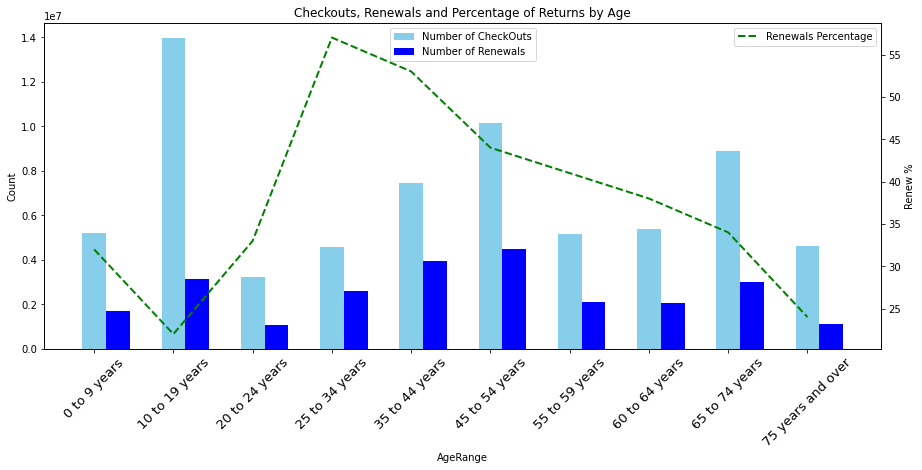

In [20]:
# Plotting bar chart of total checkouts & total renewals by age range
%matplotlib inline

plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()

# ax.figure(figsize=(20, 8))

ax2 = ax.twinx()
width = 0.3
ax.bar(df['agerange'], df['total_checkouts'], width=width, label = 'Number of CheckOuts', color='skyblue')
ax.bar(np.arange(len(df['total_renewals']))+ width, df['total_renewals'], width=width, color='blue',
       label = 'Number of Renewals' )
ax2.plot(df['agerange'], df['renewals_percentage'], label = 'Renewals Percentage', color = 'green', 
         linewidth = 2, linestyle='--')

X_axis = np.arange(len(df['agerange']))

ax.set_xticklabels(rotation = 45, fontsize = 13, labels = df['agerange'])

ax.legend(loc = 0 + 9)
ax2.legend(loc ='best', bbox_to_anchor=(1,1))


plt.title('Checkouts, Renewals and Percentage of Returns by Age')

ax.set_xlabel('AgeRange')
ax.set_ylabel('Count')
ax2.set_ylabel('Renew %')

plt.show()

### Observations from View 1:

- The most number of books are borrowed by the teenagers and they hold upto 20% of the total books checked out, whereas the renewal rate is much lower despite the high volume of books checked out. The most likely reason for this would be that the teenagers do not need to renew books as they tend to complete each book in their first 21 days of borrowal.
- Although the adult age group between (25 to 34) do not have huge number of checkouts made, the renewal percentage is highest as they may not have as much time as the teenagers to complete reading their books which leads to multiple renewals.
- The senior age group of people over 75 years also have a very low renewal rate owing to the fact that they complete using their books in the first 21 days and may not need to extend the days.

***Reference:*** https://sfpl.libanswers.com/faq/94381
  

### Key Deliverable 2: Visualize the usage of library throughout the year

The data consists of active year and active month for each user type and library, in this view we will analyse and compare the total number of checkouts and renewals made in each month of the year. Below are the steps to get this visual,
- Group the data by active month and get the aggregate sum of total number of checkouts and renewals
- Get the month name in number format to arrange the graph in a monthly ascending order
- Plot the monthly counts of both aggregated columns in a multi-line chart
- Draw the user attention towards the highest usage of library in terms of both checkouts and renewals in July

In [21]:
# Performing grouping by Active month column and finding sum of total checkouts and total renewals columns

df2 = data.groupby('active_month', as_index = False).agg({"total_checkouts": "sum", "total_renewals": "sum"})

month_dict = {'January': 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May': 5, 'June':6, 'July': 7, 
              'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December':12}

df2['month_num'] = df2['active_month'].map(month_dict)
df2 = df2.dropna()
df2['month_num'] = df2['month_num'].apply(lambda x: int(x))
df2 = df2.sort_values(by = ['month_num'], ascending = True)


df2.head(10)

,active_month,total_checkouts,total_renewals,month_num
4,January,2354425,806204,1
3,February,2098988,720467,2
7,March,2571703,917623,3
0,April,2938471,967659,4
8,May,4162757,1416862,5
6,June,6925657,2356740,6
5,July,37301700,14602781,7
1,August,2269289,778810,8
12,September,2102113,696484,9
11,October,1917568,649962,10


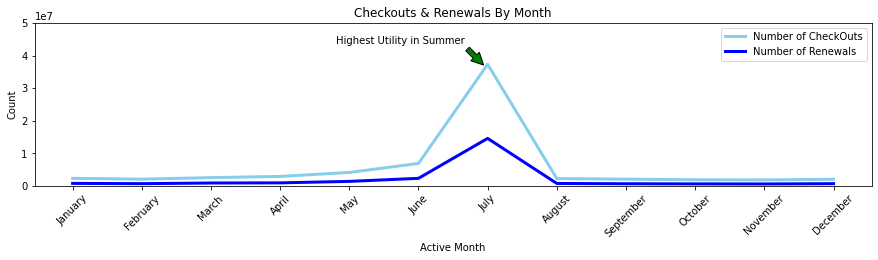

In [22]:
# Plotting line chart of checkouts and renewals by month

plt.figure(figsize = (15, 3))

plt.plot(df2['active_month'], df2['total_checkouts'], label = 'Number of CheckOuts', linewidth = 3, 
         color = 'skyblue')
plt.plot(df2['active_month'], df2['total_renewals'], label = 'Number of Renewals', linewidth = 3, 
         color = 'blue')

plt.xlabel('Active Month')
plt.ylabel('Count')

plt.title('Checkouts & Renewals By Month')
plt.annotate('Highest Utility in Summer', xy=(450,120), xycoords='axes pixels',
             xytext=(-20,20), textcoords='offset points',
             arrowprops = dict(facecolor='green', shrink = 0.05, width = 5),
            horizontalalignment='right', verticalalignment='bottom')

plt.xticks(rotation = 45)
plt.ylim([0,50000000])

plt.legend()

plt.show()

### Observations from View 2:

- From this view we can see the highest activity in July and we can attribute this behavior to the summer holidays that are usual in schools and colleges providing some time to all the folks and help them utilise the library heavily.
- We drilled down the usage by months for each age group and found that irrespective of the age group, the usage in summer is the highest.

### Key Deliverable 3: Visualize the usage of library based on years of activity

The data consists of active year for each user type and library, in this view we will analyse and compare the total number of checkouts and renewals made in each year from the start of our data ie. 2003 to 2016. Below are the steps to get this visual,
- Group the data by active year and get the aggregate sum of total number of checkouts and renewals
- Get the line graph to show usage of library over the years for both aggregated columns in a multi-line chart
- Since there is a sudden hike in usage during the year 2016, the increase for other years in not visible in the same graph, hence break the years in 2 parts and showcase the increase using subplots
- The division shows the continuos increase in every years usage and the highest peak in 2016

In [23]:
# Performing grouping by active year column and finding sum of total checkouts and total renewals column

df3 = data.groupby('active_year', as_index = False).agg({"total_checkouts": "sum", "total_renewals": "sum"})
df3 = df3[df3['active_year'] != 'None']

df3.head(5)

,active_year,total_checkouts,total_renewals
0,2003,49,20
1,2004,4226,1270
2,2005,9165,3173
3,2006,16523,6421
4,2007,23795,8772


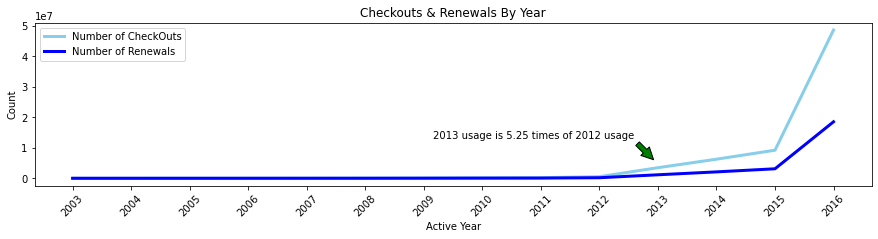

In [24]:
# Plotting line chart of checkouts and renewals by year

plt.figure(figsize = (15, 3))

plt.plot(df3['active_year'], df3['total_checkouts'], label = 'Number of CheckOuts', linewidth = 3, 
         color = 'skyblue')
plt.plot(df3['active_year'], df3['total_renewals'], label = 'Number of Renewals', linewidth = 3, 
         color = 'blue')

plt.xlabel('Active Year')
plt.ylabel('Count')

plt.title('Checkouts & Renewals By Year')
plt.annotate('2013 usage is 5.25 times of 2012 usage', xy=(620,25), xycoords='axes pixels',
             xytext=(-20,20), textcoords='offset points',
             arrowprops = dict(facecolor='green', shrink = 0.05, width = 5),
            horizontalalignment='right', verticalalignment='bottom')

plt.xticks(rotation = 45)

plt.legend()

plt.show()

### Observations from View 3a:

- From this view we can see a heavy usage starting 2013, this can be attributed to the increase in resident satisfaction for library facilities when compared to 2011. On an average, the residents offer a B to B+ for library facilities according to the SAN FRANCISO 2013 CITY SURVEY REPORT
- When comparing 2012 and 2013 the usage factor has increased by 5.25 times and in the next years it has continued to double and quadruple for Number of CheckOuts made. Viewing all the usage in one graph, does not allow us to see the changes in usage of years before 2013. Hence we have used subplots below and broken down the usage by years to get a proper view of data.

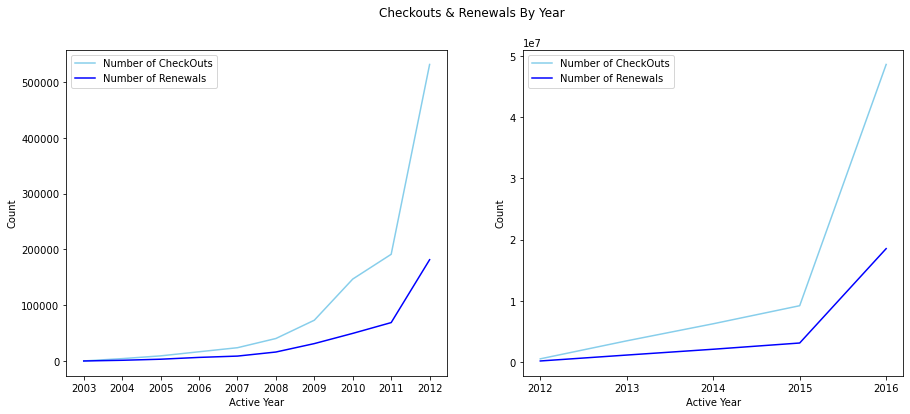

In [25]:
# Plotting line chart of checkouts and renewals by year

%matplotlib inline

plt.rcParams["figure.figsize"] = (15,6)

fig, (ax1, ax2) = plt.subplots(1,2)

yearList1 = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']
yearList2 = ['2012','2013','2014','2015','2016']

ax1.plot(df3[df3['active_year'].isin(yearList1)].active_year,
         df3[df3['active_year'].isin(yearList1)]['total_checkouts'], 
         label = 'Number of CheckOuts', color = 'skyblue')
ax1.plot(df3[df3['active_year'].isin(yearList1)].active_year,
         df3[df3['active_year'].isin(yearList1)]['total_renewals'], 
         label = 'Number of Renewals', color = 'blue')

ax2.plot(df3[df3['active_year'].isin(yearList2)].active_year,
         df3[df3['active_year'].isin(yearList2)]['total_checkouts'], 
         label = 'Number of CheckOuts', color = 'skyblue')
ax2.plot(df3[df3['active_year'].isin(yearList2)].active_year,
         df3[df3['active_year'].isin(yearList2)]['total_renewals'], 
         label = 'Number of Renewals', color = 'blue')

ax1.set_xlabel('Active Year')
ax1.set_ylabel('Count')

ax2.set_xlabel('Active Year')
ax2.set_ylabel('Count')

fig.suptitle('Checkouts & Renewals By Year')

ax1.legend()
ax2.legend()

plt.show()

### Observations from View 3b:

- Viewing the usage throughout years helps to understand the increment has been continuous even before 2013, but the highest increase factor was from the year 2012 to 2013 with a increased checkouts rate of 5.25 times the previous year.

In [26]:
# Performing grouping by Active month and year column and finding sum of total checkouts and total renewals

df3a = data.groupby(['active_year','active_month'], as_index = False).agg({"total_checkouts": "sum",
                                                                           "total_renewals": "sum"})

month_dict = {'January': '1', 'February' : '2', 'March' : '3', 'April' : '4', 'May': '5', 'June': '6', 
              'July': '7', 'August': '8',  'September': '9', 'October': '10', 'November': '11', 
              'December': '12'}

df3a['month_num'] = df3a['active_month'].map(month_dict)
df3a = df3a.dropna()
df3a['month_num'] = df3a['month_num'].apply(lambda x: x.zfill(2))

df3a['active_yyyymm'] = df3a['active_year'] + df3a['month_num']

df3a = df3a.sort_values(by = ['active_year','month_num'], ascending = [True,True])

df3a = df3a[df3a['active_year'] != '2016']

df3a.tail(5)

,active_year,active_month,total_checkouts,total_renewals,month_num,active_yyyymm
134,2015,August,980993,335979,08,201508
144,2015,September,907907,299970,09,201509
143,2015,October,895427,306278,10,201510
142,2015,November,838405,282735,11,201511
135,2015,December,965755,351139,12,201512


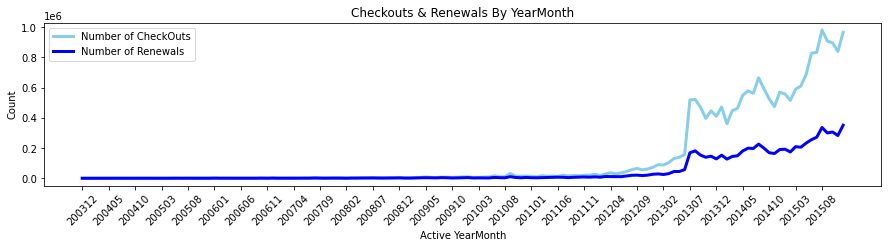

In [27]:
# Plotting line chart of checkouts and renewals by year and month

plt.figure(figsize = (15, 3))

plt.plot(df3a['active_yyyymm'], df3a['total_checkouts'], label = 'Number of CheckOuts', linewidth = 3,
         color = 'skyblue')
plt.plot(df3a['active_yyyymm'], df3a['total_renewals'], label = 'Number of Renewals', linewidth = 3,
         color = 'blue')

plt.xlabel('Active YearMonth')
plt.ylabel('Count')

plt.title('Checkouts & Renewals By YearMonth')
# plt.annotate('2013 usage is 5.25 times of 2012 usage', xy=(620,25), xycoords='axes pixels',
#              xytext=(-20,20), textcoords='offset points',
#              arrowprops = dict(facecolor='green', shrink = 0.05, width = 5),
#             horizontalalignment='right', verticalalignment='bottom')

plt.xticks(np.arange(0, len(df3a['active_yyyymm']),5),rotation = 45)

plt.legend()

plt.show()

### Observations from View 3c:

- We removed 2016 data for the view to visualize the increment throughout the active years and months together. 
- Here also we see that the usage of Library actually picked up from July 2013 at which point the usage increased about 3 times compared to previous month (June 2013).

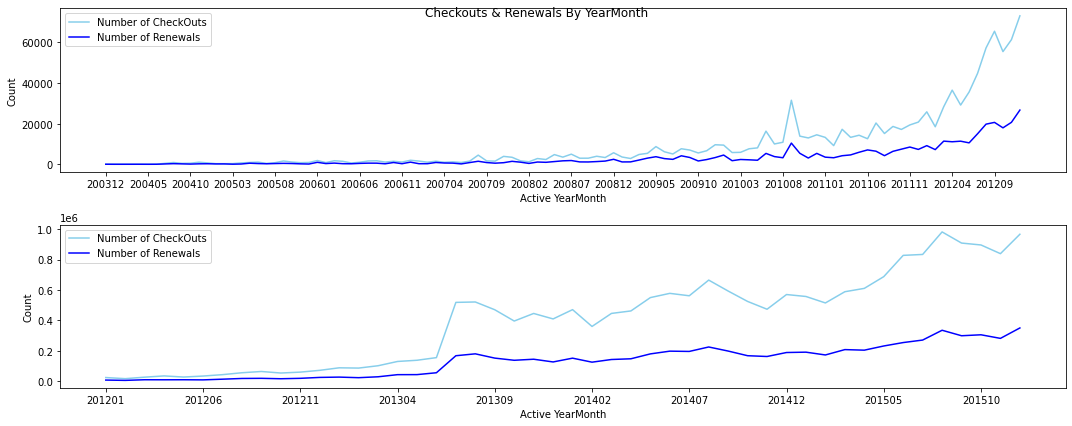

In [28]:
# Plotting line chart of checkouts and renewals by year

%matplotlib inline

plt.rcParams["figure.figsize"] = (15,6)

fig, (ax1, ax2) = plt.subplots(2,1)

yearList1 = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']
yearList2 = ['2012','2013','2014','2015','2016']

ax1.plot(df3a[df3a['active_year'].isin(yearList1)].active_yyyymm,
         df3a[df3a['active_year'].isin(yearList1)]['total_checkouts'], 
         label = 'Number of CheckOuts', color = 'skyblue')
ax1.plot(df3a[df3a['active_year'].isin(yearList1)].active_yyyymm,
         df3a[df3a['active_year'].isin(yearList1)]['total_renewals'], 
         label = 'Number of Renewals', color = 'blue')

ax2.plot(df3a[df3a['active_year'].isin(yearList2)].active_yyyymm,
         df3a[df3a['active_year'].isin(yearList2)]['total_checkouts'], 
         label = 'Number of CheckOuts', color = 'skyblue')
ax2.plot(df3a[df3a['active_year'].isin(yearList2)].active_yyyymm,
         df3a[df3a['active_year'].isin(yearList2)]['total_renewals'], 
         label = 'Number of Renewals', color = 'blue')

ax1.set_xlabel('Active YearMonth')
ax1.set_ylabel('Count')
ax1.set_xticks(np.arange(0, len(df3a[df3a['active_year'].isin(yearList1)]['active_yyyymm']),5))

ax2.set_xlabel('Active YearMonth')
ax2.set_ylabel('Count')
ax2.set_xticks(np.arange(0, len(df3a[df3a['active_year'].isin(yearList2)]['active_yyyymm']),5))

plt.tight_layout()

fig.suptitle('Checkouts & Renewals By YearMonth')

ax1.legend()
ax2.legend()

plt.show()

### Observations from View 3d:

- In the data which does not contain 2016 data we brokedown the view to visualize the increment throughout the active years and months together. 
- In the first subplot we see that the first huge hike started occuring from September 2010 (3 times higher than previous month), after which it continued to increase throughout the years.
- Here also we see that the usage of Library actually picked up from July 2013 at which point the usage increased about 3 times compared to previous month (June 2013).

### Key Deliverable 4: Visualize the effect on usage based on library location

The data consists of home library recorded for each user type and age group, in this view we will analyse and compare the total number of checkouts and renewals made when home library is located inside the county and outside the county. Below are the steps to get this visual,
- Group the data by home library name and county indicator, and get the aggregate sum of total number of checkouts and renewals
- Divide the data into 2 dataframes, having location outside county and inside country separately
- Merge the data based on home library name to get all the numerical data in separate columns at library level
- Remove the library names that contain Bookmobile as they do not have a specific location and skew the distribution of our data
- Get the clustered column graph to show usage of library based on location for both CheckOuts and Renewals
- Draw the line showing the usage factor based on location in the same graph to get a guage on the effect of location

***Definitions:***
- **Home Library:** The Library closest to the patron's residential location
- **Bookmobile:** It is a mobile library service that works beyond physical locations, the vehicle visits over 60 locations to help the patrons use the facility effectively

**Reference:** https://sfpl.org/locations/bookmobiles-mobile-outreach

In [29]:
# Performing grouping of home library type and outside county columns and summarizing numeric variables

df4a = data.groupby(['home_lib_type', 'outside_county'], as_index = False).agg({"total_checkouts": "sum",
                                                                                "total_renewals": "sum"})

print(df4a.shape)
df4a.head(5)

(70, 4)


,home_lib_type,outside_county,total_checkouts,total_renewals
0,Anza,False,1677937,664041
1,Anza,True,35112,18331
2,Bayview/Linda Brooks-Burton,False,490978,145227
3,Bayview/Linda Brooks-Burton,True,21639,5738
4,Bernal Heights,False,1330112,514413


In [30]:
# Seperating the dataframe into data for outside county and inside county and dropping redundant columns

df4a_F = df4a[df4a['outside_county'] == False]
df4a_T = df4a[df4a['outside_county'] == True]

df4a_F = df4a_F.rename(columns = {'total_checkouts':'total_checkouts_F', 'total_renewals':'total_renewals_F'})
df4a_T = df4a_T.rename(columns = {'total_checkouts':'total_checkouts_T', 'total_renewals':'total_renewals_T'})

df4a_F = df4a_F.drop(columns = 'outside_county')
df4a_T = df4a_T.drop(columns = 'outside_county')

df4a_F.reset_index(drop = True)
df4a_T.reset_index(drop = True)

print(df4a_F.shape)
print(df4a_F.columns)
print(df4a_T.shape)
print(df4a_T.columns)

(35, 3)
Index(['home_lib_type', 'total_checkouts_F', 'total_renewals_F'], dtype='object')
(35, 3)
Index(['home_lib_type', 'total_checkouts_T', 'total_renewals_T'], dtype='object')


In [31]:
# merging the dataframes to get data at library level

df4a_merged = pd.merge(df4a_F,df4a_T, on=['home_lib_type'])
print(df4a_merged.shape)
print(df4a_merged.columns)

(35, 5)
Index(['home_lib_type', 'total_checkouts_F', 'total_renewals_F',
       'total_checkouts_T', 'total_renewals_T'],
      dtype='object')


In [32]:
# Creating columns for holding the usage factor based on library location

df4a_merged['checkouts_compare'] = df4a_merged['total_checkouts_F'] / df4a_merged['total_checkouts_T']
df4a_merged['renewals_compare'] = df4a_merged['total_renewals_F'] / df4a_merged['total_renewals_T']

In [33]:
print(df4a_merged['checkouts_compare'].min())
print(df4a_merged['checkouts_compare'].max())
print(df4a_merged['renewals_compare'].min())
print(df4a_merged['renewals_compare'].max())

6.881842495941957
172.5
4.168953151533313
89.85714285714286


In [34]:
# Removing the data on BookMobile type of libraries as they do not have a specific location

df4a_merged = df4a_merged[~df4a_merged['home_lib_type'].str.contains('Bookmobile')]

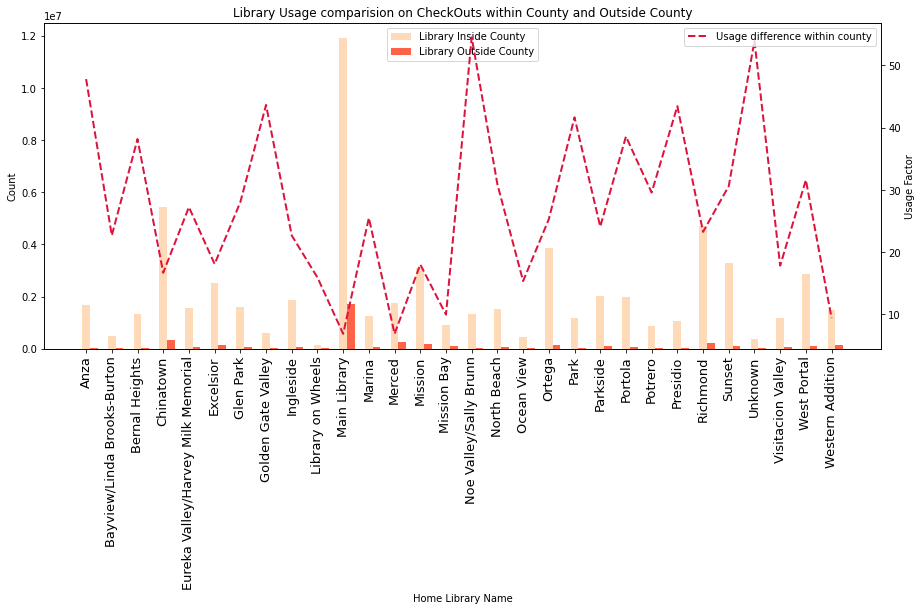

In [35]:
# Plotting bar chart of total checkouts within county and outside county by home library
%matplotlib inline

plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()

# ax.figure(figsize=(20, 8))

ax2 = ax.twinx()
width = 0.3
ax.bar(df4a_merged['home_lib_type'], df4a_merged['total_checkouts_F'], width=width, 
       label = 'Library Inside County', color='peachpuff')
ax.bar(np.arange(len(df4a_merged['home_lib_type']))+ width, df4a_merged['total_checkouts_T'], 
       width=width, label = 'Library Outside County', color='tomato')
ax2.plot(df4a_merged['home_lib_type'], df4a_merged['checkouts_compare'], 
         label = 'Usage difference within county', color = 'crimson', linewidth = 2, linestyle='--')

X_axis = np.arange(len(df4a_merged['home_lib_type']))

ax.set_xticklabels(rotation = 90, fontsize = 13, labels = df4a_merged['home_lib_type'])

ax.legend(loc = 0 + 9)
ax2.legend(loc ='upper right')


plt.title('Library Usage comparision on CheckOuts within County and Outside County')

ax.set_xlabel('Home Library Name')
ax.set_ylabel('Count')
ax2.set_ylabel('Usage Factor')

plt.show()

### Observations from View 4a:

- In this data we have data at library level and the clustered column graph compares the number of CheckOuts in home library when the location is outside county vs. when it is located inside county 
- We see that in all the cases the usage of a library increases multiple folds when it is located inside the county. The Usage factor drawn against each library also shows that, 
    - In the minimum case the usage of libraries within county is atleast 6 times higher than the library located outside county
    - For a maximum value this factor goes as high as 55, showing that the vicinity of the library for patron's house has a huge impact on the usage of its facility

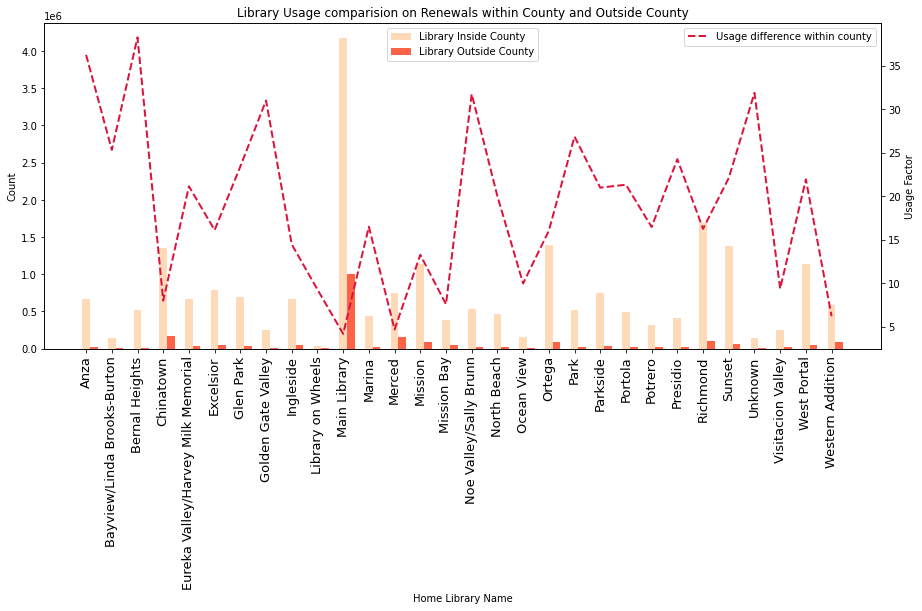

In [36]:
# Plotting bar chart of total checkouts within county and outside county by home library

%matplotlib inline

plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()

# ax.figure(figsize=(20, 8))

ax2 = ax.twinx()
width = 0.3
ax.bar(df4a_merged['home_lib_type'], df4a_merged['total_renewals_F'], width=width, 
       label = 'Library Inside County', color='peachpuff')
ax.bar(np.arange(len(df4a_merged['home_lib_type']))+ width, df4a_merged['total_renewals_T'], 
       width=width, label = 'Library Outside County', color='tomato')
ax2.plot(df4a_merged['home_lib_type'], df4a_merged['renewals_compare'], 
         label = 'Usage difference within county', color = 'crimson', linewidth = 2, linestyle='--')

X_axis = np.arange(len(df4a_merged['home_lib_type']))

ax.set_xticklabels(rotation = 90, fontsize = 13, labels = df4a_merged['home_lib_type'])

ax.legend(loc = 0 + 9)
ax2.legend(loc ='best', bbox_to_anchor=(1,1))


plt.title('Library Usage comparision on Renewals within County and Outside County')

ax.set_xlabel('Home Library Name')
ax.set_ylabel('Count')
ax2.set_ylabel('Usage Factor')

plt.show()

### Observations from View 4b:

- In this data we have data at library level and the clustered column graph compares the number of Renewals in home library when the location is outside county vs. when it is located inside county 
- We see that in all the cases the usage of a library increases multiple folds when it is located inside the county. The Usage factor drawn against each library also shows that, 
    - In the minimum case the usage of libraries within county is atleast 4 times higher than the library located outside county
    - For a maximum value this factor goes as high as 38, showing that the vicinity of the library for patron's house has a huge impact on the usage of its facility

In [37]:
# Performing grouping of age range and outside county columns and summarizing numeric variables

df4b = data.groupby(['agerange', 'outside_county'], as_index = False).agg({"total_checkouts": "sum", 
                                                                           "total_renewals": "sum"})

print(df4b.shape)
df4b.head(5)

(20, 4)


,agerange,outside_county,total_checkouts,total_renewals
0,0 to 9 years,False,5057972,1609290
1,0 to 9 years,True,142353,72609
2,10 to 19 years,False,13615820,2996420
3,10 to 19 years,True,333339,132553
4,20 to 24 years,False,3110836,999871


In [38]:
# Seperating the dataframe into data for outside county and inside county and dropping redundant columns

df4b_F = df4b[df4b['outside_county'] == False]
df4b_T = df4b[df4b['outside_county'] == True]

df4b_F = df4b_F.rename(columns = {'total_checkouts':'total_checkouts_F', 'total_renewals':'total_renewals_F'})
df4b_T = df4b_T.rename(columns = {'total_checkouts':'total_checkouts_T', 'total_renewals':'total_renewals_T'})

df4b_F = df4b_F.drop(columns = 'outside_county')
df4b_T = df4b_T.drop(columns = 'outside_county')

df4b_F.reset_index(drop = True)
df4b_T.reset_index(drop = True)

print(df4b_F.shape)
print(df4b_F.columns)
print(df4b_T.shape)
print(df4b_T.columns)

(10, 3)
Index(['agerange', 'total_checkouts_F', 'total_renewals_F'], dtype='object')
(10, 3)
Index(['agerange', 'total_checkouts_T', 'total_renewals_T'], dtype='object')


In [39]:
# merging the dataframes to get data at library level

df4b_merged = pd.merge(df4b_F,df4b_T, on=['agerange'])
print(df4b_merged.shape)
print(df4b_merged.columns)

(10, 5)
Index(['agerange', 'total_checkouts_F', 'total_renewals_F',
       'total_checkouts_T', 'total_renewals_T'],
      dtype='object')


In [40]:
# Creating columns for holding the usage factor based on age range

df4b_merged['checkouts_compare'] = df4b_merged['total_checkouts_F'] / df4b_merged['total_checkouts_T']
df4b_merged['renewals_compare'] = df4b_merged['total_renewals_F'] / df4b_merged['total_renewals_T']

In [41]:
print(df4b_merged['checkouts_compare'].min())
print(df4b_merged['checkouts_compare'].max())
print(df4b_merged['renewals_compare'].min())
print(df4b_merged['renewals_compare'].max())

9.760332427346853
40.84676560498472
6.7552979115479115
22.60544838668306


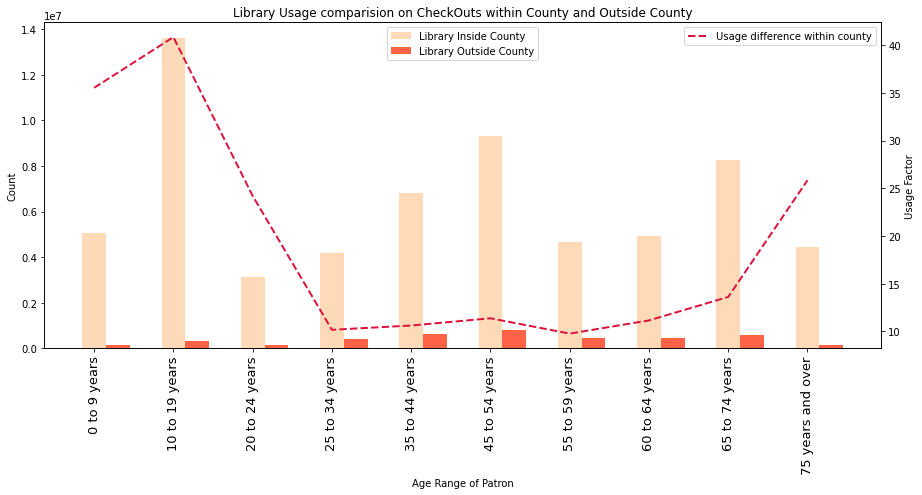

In [42]:
# Plotting bar chart of total checkouts within county and outside county by age range
%matplotlib inline

plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()

# ax.figure(figsize=(20, 8))

ax2 = ax.twinx()
width = 0.3
ax.bar(df4b_merged['agerange'], df4b_merged['total_checkouts_F'], width=width, 
       label = 'Library Inside County', color='peachpuff')
ax.bar(np.arange(len(df4b_merged['agerange']))+ width, df4b_merged['total_checkouts_T'], 
       width=width, label = 'Library Outside County', color='tomato')
ax2.plot(df4b_merged['agerange'], df4b_merged['checkouts_compare'], 
         label = 'Usage difference within county', color = 'crimson', linewidth = 2, linestyle='--')

X_axis = np.arange(len(df4b_merged['agerange']))

ax.set_xticklabels(rotation = 90, fontsize = 13, labels = df4b_merged['agerange'])

ax.legend(loc = 0 + 9)
ax2.legend(loc ='best', bbox_to_anchor=(1,1))


plt.title('Library Usage comparision on CheckOuts within County and Outside County')

ax.set_xlabel('Age Range of Patron')
ax.set_ylabel('Count')
ax2.set_ylabel('Usage Factor')

plt.show()

### Observations from View 4c:

- In this data we have data at age level group and the clustered column graph compares the number of CheckOuts in home library when the location is outside county vs. when it is located inside county 
- We see that in all the cases the usage of a library increases multiple folds when it is located inside the county. The Usage factor drawn against each age group also shows that, 
    - In the minimum case the usage of libraries within county is atleast 9 times higher than the library located outside county
    - For a maximum value this factor goes as high as 40, showing that the vicinity of the library for patron's house has a huge impact on the usage of its facility
    - With this comparision we can find that the users that are most affected by library location are in the age group of 10 to 19 years or 75 years and older. This can be reasoned by attributing the availability of car for the people in this group and how it affects their usage

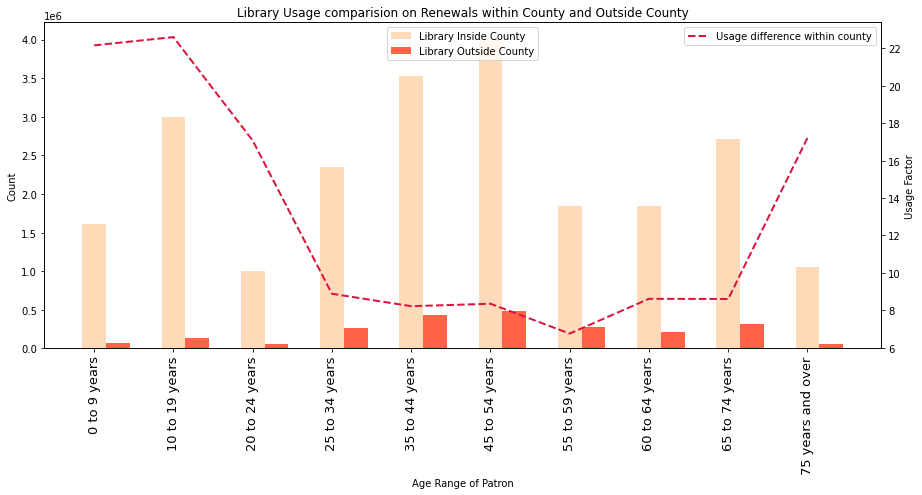

In [43]:
# Plotting bar chart of total renewals within county and outside county by age range
%matplotlib inline

plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()

# ax.figure(figsize=(20, 8))

ax2 = ax.twinx()
width = 0.3
ax.bar(df4b_merged['agerange'], df4b_merged['total_renewals_F'], width=width, 
       label = 'Library Inside County', color='peachpuff')
ax.bar(np.arange(len(df4b_merged['agerange']))+ width, df4b_merged['total_renewals_T'], 
       width=width, label = 'Library Outside County', color='tomato')
ax2.plot(df4b_merged['agerange'], df4b_merged['renewals_compare'], 
         label = 'Usage difference within county', color = 'crimson', linewidth = 2, linestyle='--')

X_axis = np.arange(len(df4b_merged['agerange']))

ax.set_xticklabels(rotation = 90, fontsize = 13, labels = df4b_merged['agerange'])

ax.legend(loc = 0 + 9)
ax2.legend(loc ='best', bbox_to_anchor=(1,1))


plt.title('Library Usage comparision on Renewals within County and Outside County')

ax.set_xlabel('Age Range of Patron')
ax.set_ylabel('Count')
ax2.set_ylabel('Usage Factor')

plt.show()

### Observations from View 4d:

- In this data we have data at age group level and the clustered column graph compares the number of Renewals in home library when the location is outside county vs. when it is located inside county 
- We see that in all the cases the usage of a library increases multiple folds when it is located inside the county. The Usage factor drawn against each age group also shows that, 
    - In the minimum case the usage of libraries within county is atleast 6 times higher than the library located outside county
    - For a maximum value this factor goes as high as 22, showing that the vicinity of the library for patron's house has a huge impact on the usage of its facility
    - With this comparision we can find that the users that are most affected by library location are in the age group of 10 to 19 years or 75 years and older. This can be reasoned by attributing the availability of car for the people in this group and how it affects their usage

### Key Deliverable 5: Analyse the difference in notice preference type based on age group

The data consists of notice preference type recorded for age group, in this view we will analyse and understand how the types of notice preferences differ based on age groups. Below are the steps to get this visual,
- Group the data by age group and notice preference type, and get the aggregate count of preference of each age group
- Organise the dataframe and unstack to populate all cell values in the categorical columns and rename the columns according to the column values
- Draw a simple line chart to compare the preferred contact type of each age group, this graph gives us an understanding of patron's preferences
- Get an elaborate view with the percentage of each preferences for different age groups separately using piecharts.

***Definitions:***
- **Notice Preference Type:** Patron may choose to receive notices from SFPL by email, telephone, or postal mail. This is the values stored in the notice_preference_type column.

**Reference:** https://www.sfpl.libanswers.com/faq/97331

In [44]:
# Performing grouping of agerange and notice preference type and finding count of notice preference type 

df5=data.groupby(['agerange','notice_preference_type'],as_index=True).agg({"notice_preference_type":"count"})

df5.head(5)

notice_preference_type
agerange       notice_preference_type                        
0 to 9 years   email                                    27475
               phone                                     6630
               print                                     4135
10 to 19 years email                                    38055
               phone                                    15058

In [45]:
# Performing reshaping and converting data into unstacked format

df5 = df5.unstack(1)
df5.head()

notice_preference_type             
notice_preference_type                  email  phone print
agerange                                                  
0 to 9 years                            27475   6630  4135
10 to 19 years                          38055  15058  5831
20 to 24 years                          23809   3823  2128
25 to 34 years                          79351   7035  4697
35 to 44 years                          57698   6499  3193

In [46]:
df5.columns

MultiIndex([('notice_preference_type', 'email'),
            ('notice_preference_type', 'phone'),
            ('notice_preference_type', 'print')],
           names=[None, 'notice_preference_type'])

In [47]:
# Renaming columns

df5.columns = ['Email', 'Phone', 'Print']

df5.head()

,Email,Phone,Print
agerange,,,
0 to 9 years,27475,6630,4135
10 to 19 years,38055,15058,5831
20 to 24 years,23809,3823,2128
25 to 34 years,79351,7035,4697
35 to 44 years,57698,6499,3193


In [48]:
# Resetting index of dataframe so that age range is considered as column

df5 = df5.reset_index()
df5.head()

,agerange,Email,Phone,Print
0,0 to 9 years,27475,6630,4135
1,10 to 19 years,38055,15058,5831
2,20 to 24 years,23809,3823,2128
3,25 to 34 years,79351,7035,4697
4,35 to 44 years,57698,6499,3193


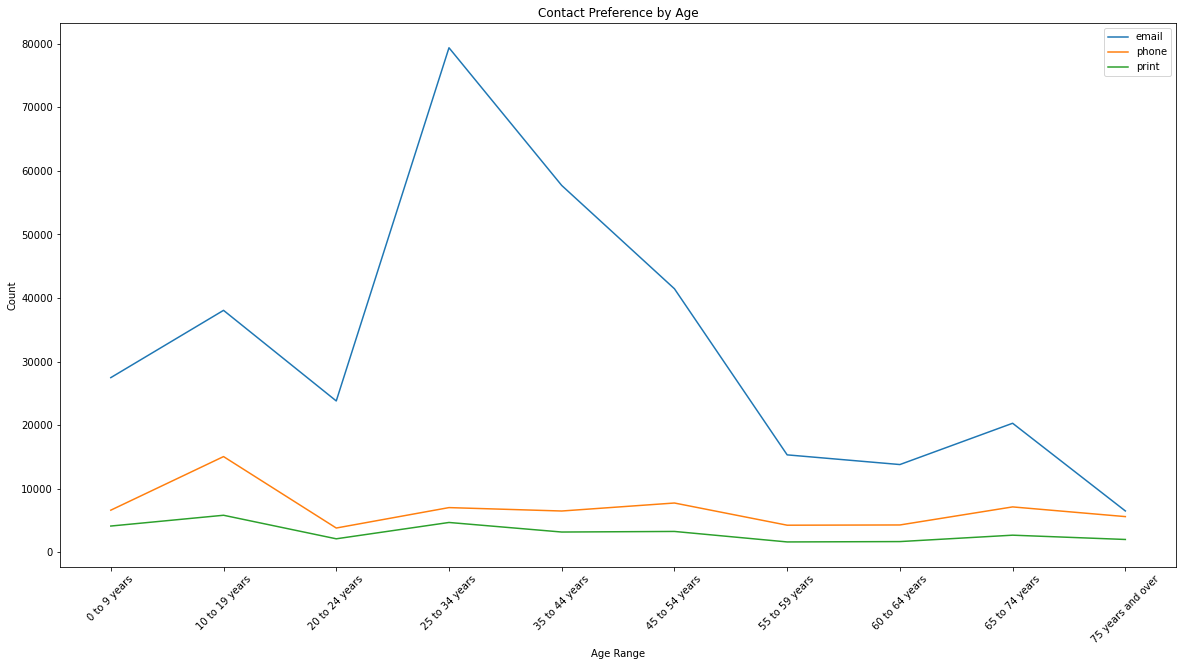

In [49]:
# Plotting line chart of contact preference by age 

plt.figure(figsize = (20, 10))

plt.plot(df5['agerange'], df5['Email'], label = 'email')
plt.plot(df5['agerange'], df5['Phone'], label = 'phone')
plt.plot(df5['agerange'], df5['Print'], label = 'print')

plt.xlabel('Age Range')
plt.ylabel('Count')

plt.xticks(rotation = 45)

plt.title('Contact Preference by Age')

plt.legend()

plt.show()

### Observations from View 5:

In this data we have data at age group level and the multi-line graph compares the preference of each user group. We see that in all the age groups email is the most preferred contact preference.
   - The email preference type is the highest among the users in the age range of 25 to 34 years and lowest in the users who are 75 years and older. This shows that the accessibility to emails reduces with age and may be attributed to the digital awareness of users or availability of computers.

In [50]:
df6=data.groupby(['agerange','notice_preference_type'],as_index=True).agg({"notice_preference_type":"count"})
df6 = df6.rename(columns = {'notice_preference_type':'notice_preference_type_count'})
df6.head(5)

notice_preference_type_count
agerange       notice_preference_type                              
0 to 9 years   email                                          27475
               phone                                           6630
               print                                           4135
10 to 19 years email                                          38055
               phone                                          15058

In [51]:
df6 = df6.reset_index()

In [52]:
df6.head()

,agerange,notice_preference_type,notice_preference_type_count
0,0 to 9 years,email,27475
1,0 to 9 years,phone,6630
2,0 to 9 years,print,4135
3,10 to 19 years,email,38055
4,10 to 19 years,phone,15058


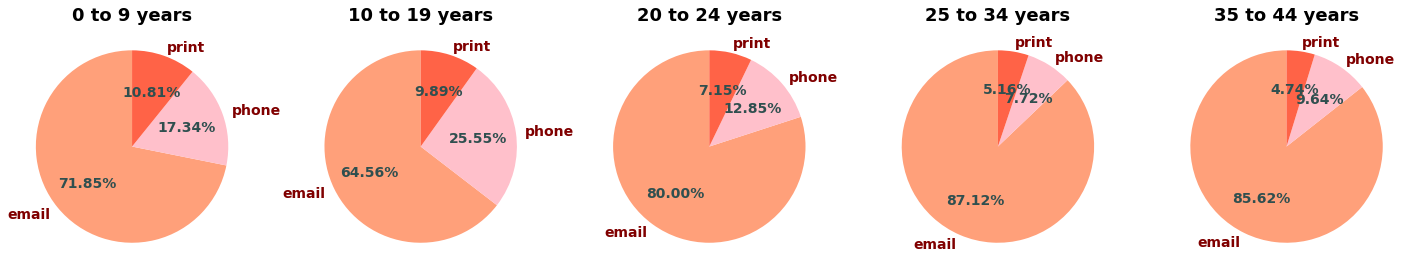

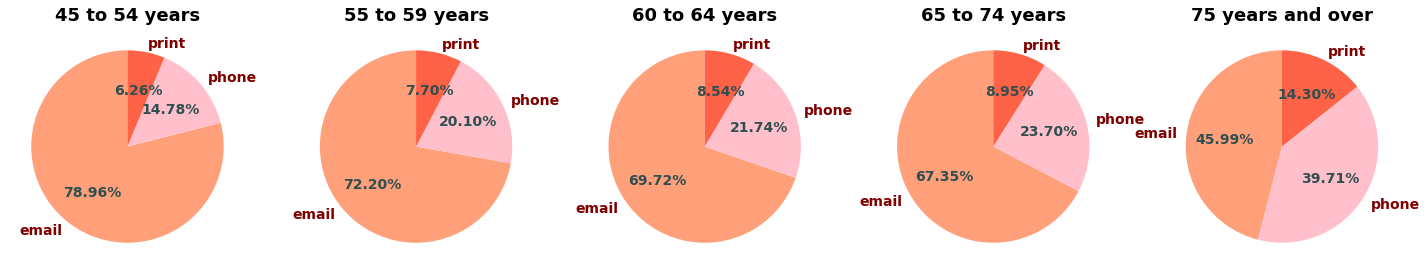

In [53]:
unique_ages = df6['agerange'].unique()

%matplotlib inline

plt.rcParams["figure.figsize"] = (25,8)

colors = ['aquamarine', 'turquoise', 'lightseagreen']
# colors1 = ['lightsteelblue', 'cornflowerblue', 'royalblue']
colors1 = ['lightsalmon', 'pink', 'tomato']

for i in range(0,len(unique_ages),5):
    
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
    
    wedges1,texts1,autopcts1 = ax1.pie(df6[df6['agerange'] == unique_ages[i]].notice_preference_type_count,
                                         startangle=90, autopct='%1.2f%%', 
                                         labels = df6['notice_preference_type'].unique(), colors = colors1)
    ax1.set_title(unique_ages[i], weight = 'bold', fontsize = 18)
    plt.setp(autopcts1, **{'color':'darkslategrey', 'weight':'bold', 'fontsize':14})
    plt.setp(texts1, **{'color':'maroon', 'weight':'bold', 'fontsize':14})
    
    wedges2,texts2,autopcts2 = ax2.pie(df6[df6['agerange'] == unique_ages[i+1]].notice_preference_type_count,
                                         startangle=90, autopct='%1.2f%%', 
                                         labels = df6['notice_preference_type'].unique(), colors = colors1)
    ax2.set_title(unique_ages[i+1], weight = 'bold', fontsize = 18)
    plt.setp(autopcts2, **{'color':'darkslategrey', 'weight':'bold', 'fontsize':14})
    plt.setp(texts2, **{'color':'maroon', 'weight':'bold', 'fontsize':14})
    
    wedges3,texts3,autopcts3 = ax3.pie(df6[df6['agerange'] == unique_ages[i+2]].notice_preference_type_count,
                                         startangle=90, autopct='%1.2f%%',
                                         labels = df6['notice_preference_type'].unique(), colors = colors1)
    ax3.set_title(unique_ages[i+2], weight = 'bold', fontsize = 18)
    plt.setp(autopcts3, **{'color':'darkslategrey', 'weight':'bold', 'fontsize':14})
    plt.setp(texts3, **{'color':'maroon', 'weight':'bold', 'fontsize':14})
    
    wedges4,texts4,autopcts4 = ax4.pie(df6[df6['agerange'] == unique_ages[i+3]].notice_preference_type_count,
                                         startangle=90, autopct='%1.2f%%',
                                         labels = df6['notice_preference_type'].unique(), colors = colors1)
    ax4.set_title(unique_ages[i+3], weight = 'bold', fontsize = 18)
    plt.setp(autopcts4, **{'color':'darkslategrey', 'weight':'bold', 'fontsize':14})
    plt.setp(texts4, **{'color':'maroon', 'weight':'bold', 'fontsize':14})
      
    wedges5,texts5,autopcts5 = ax5.pie(df6[df6['agerange'] == unique_ages[i+4]].notice_preference_type_count,
                                         startangle=90, autopct='%1.2f%%', 
                                         labels = df6['notice_preference_type'].unique(), colors = colors1)
    ax5.set_title(unique_ages[i+4], weight = 'bold', fontsize = 18)
    plt.setp(autopcts5, **{'color':'darkslategrey', 'weight':'bold', 'fontsize':14})
    plt.setp(texts5, **{'color':'maroon', 'weight':'bold', 'fontsize':14})
    
    
    plt.show()

### Observations from View 5a:

In this data we have data at age group level and the combination of pie charts compares the preference of each user group and provide the difference in percentage of a whole. We see that in all the age groups email is the most preferred contact preference range from 46% to 87% out of the total preferences.
   - The email preference type is the highest among the users in the age range of 25 to 34 years and lowest in the users who are 75 years and older. 
   - We also see that the percentage preference of phone and print gets higher starting from the age group 45 to 54 years and is the highest among the users who are 75 years and older
   
This shows that the accessibility to emails reduces with increase in age and may be attributed to the digital awareness of users or availability of computers. This also gives us an insight on the shift of preferences from digital to non-digital mediums as user's age increases. Same is the case with the younger age groups, which can also be attributed to the same reasons.



### Key Deliverable 6: Most Common Patron Type

The data consists of user types recorded and their library usage, in this view we will visualize and understand the most common patron types based on the font size of each patron. Below are the steps to get this visual,
- Get the patron type column data into a list and join all the elements to form one element
- Use the WordCloud Library to showcase the most common patron types by emphasizing using the fontsize and color of each word

***Definitions:***
- **Patron Type:** Patron type value may change based on the age, profession, location and residential status of the user. This is recorded at the time of library card application. Any resident of California can apply for a Free Library card, for people without a valid ID the card costs 10 dollars and is valid for 3 months.

**References:**
- https://sfpl.org/get-card-0
- https://sfpl.libanswers.com/faq/129952#types

In [54]:
# Create a list of word
text=data['patron_type'].to_list()
# text_join = [''.join(i) for i in text]
text_join = ' '.join(text)
text_join[0:20]

'SENIOR ADULT ADULT A'

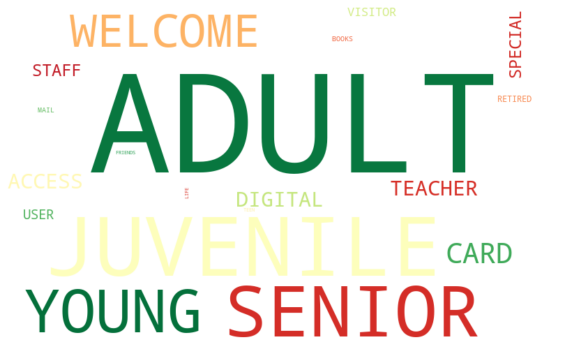

In [55]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Create the wordcloud object
wordcloud = WordCloud(width=800, height=500, background_color='white', colormap = "RdYlGn", 
                      collocations=False, random_state=0).generate(text_join)

plt.figure(figsize = (10,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Observations from View 6:

In this data we have the list of all patron types and we aim to identify the most common types of users.
   - The Patron Type column shows that the most common library card holder in SFPL usage is of type ADULT, followed by JUVENILE and SENIOR users.
       - ADULT: Patron with age 19-64 and a valid CA ID
       - JUVENILE: Patron with age 0-12 and a valid CA ID and application signed by parent/guardian
       - SENIOR: Patron with age 65 years or older and a valid CA ID
       
**Reference:**
- https://sfpl.libanswers.com/faq/129952#types

### Key Deliverable 7: Most used Home Library Branch

The data consists of home library names and their library usage, in this view we will visualize and understand the most used libraries based on the font size of each library branch name. Below are the steps to get this visual,
- Get the home library name column data into a list and join all the elements to form one element
- Use the WordCloud Library to showcase the most used home library branches by emphasizing using the fontsize and color of each word


In [56]:
# Create a list of word
lib=data['home_lib_type'].to_list()

lib_join = ' '.join(lib)
lib_join[0:20]

'Main Library Main Li'

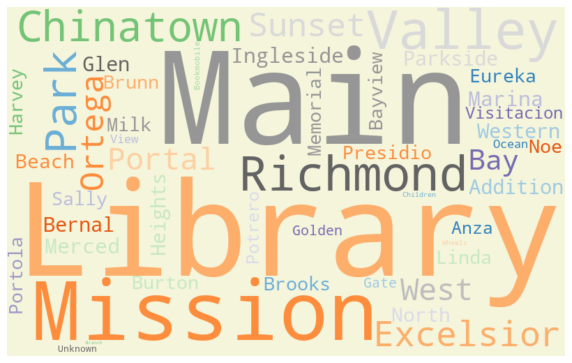

In [57]:
# Create the wordcloud object
wordcloud = WordCloud(width=800, height=500, background_color='beige', colormap = "tab20c", 
                      collocations=False, random_state=0).generate(lib_join)

plt.figure(figsize = (10,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Observations from View 7:

In this data we have the list of all home library branches and we aim to identify the most used branch.
   - The home library type column shows that the most used library in SFPL is Main Library, followed by Mission and Richmond branches.
       - The Main Library is located at **100 Larkin Street San Francisco, CA 94102** and it has one of the largest collection of books and has many other amenities that are helpful for the Patrons
 
       
**References:**
- https://sfpl.org/locations/#!/filters?sort_by=weight&sort_order=ASC&items_per_page=50
- https://sfpl.org/locations/main-library/about